### Data Augmentation으로 비정형 데이터의 증가

In [1]:
from PIL import Image
import glob

In [2]:
# Folder Name
dirNames = ['Aiden', 'Andrew', 'Cathy']

In [3]:
# 작업 폴더
import os
os.mkdir("./Face")
os.mkdir("./Face/Data")
for name in dirNames: 
    os.mkdir(f"./Face/Data/{name}")

In [4]:
# Rotation과 Flip으로 데이터 증강
for name in dirNames:
    counter = 0
    for file in sorted(glob.glob(f"/kaggle/input/data-face/{name}/image*.jpg")):
        imgData = Image.open(file)
        for angle in range(-15, 15, 1):
            counter+=1
            imgData2 = imgData.rotate(angle)
            imgData2.save(f"/kaggle/working/Face/Data/{name}/rotation_{counter:03d}.png")
            imgData3 = imgData2.transpose(Image.FLIP_LEFT_RIGHT)
            imgData3.save(f"/kaggle/working/Face/Data/{name}/flip_{counter:03d}.png")

In [5]:
# 확인 : 18 * 30 * 2 = 1080
for name in dirNames:
    print(name, ":", len(sorted(glob.glob(f"/kaggle/working/Face/Data/{name}/*.*"))))

Aiden : 1080
Andrew : 1080
Cathy : 1080


### 3명의 얼굴을 학습하여 인식하기

In [6]:
import numpy as np

---
### 전체 사진중 최대 해상도 찾기

In [11]:
# folder중 최대 해상도 찾기
widthRatio = []
heightRatio = []
for name in dirNames:
    for file in sorted(glob.glob(f"/kaggle/working/Face/Data/{name}/*.png")):
        img = np.array(Image.open(file))
        widthRatio.append(img.shape[1])
        heightRatio.append(img.shape[0])

In [12]:
print('너비 최대 해상도 :', np.max(widthRatio))
print('높이 최대 해상도 :', np.max(heightRatio))

너비 최대 해상도 : 299
높이 최대 해상도 : 381


> 해상도의 크기 : 400 * 300 

---
### 전체 사진을 흑백으로 변경하고 검은색 배경(400*300)의 중앙에 일치시켜 저장하기 

In [14]:
# 작업 폴더 생성
import os
os.mkdir("./Face/Gray")

In [15]:
# 이름별 directory 생성
for name in dirNames:
    os.mkdir(f"./Face/Gray/{name}")

In [16]:
for name in dirNames:
    fileCount = 0
    for file in sorted(glob.glob(f"/kaggle/working/Face/Data/{name}/*.png")):
        img = Image.open(file)
        imgResize = img.convert('L')
        imgArray = np.array(imgResize)

        imgDummy = np.zeros(400*300).reshape(400, 300)
        rowNum = (400 - imgArray.shape[0]) / 2
        colNum = (300 - imgArray.shape[1]) / 2

        k = 0
        for i in range(int(rowNum), int(rowNum)+imgArray.shape[0]):
            l = 0
            for j in range(int(colNum), int(colNum)+imgArray.shape[1]):
                imgDummy[i,j] = imgArray[k,l]
                l+=1
            k+=1
        img2 = Image.fromarray(imgDummy.astype('uint8'), 'L')
        img2.save(f"/kaggle/working/Face/Gray/{name}/image_{fileCount:04d}.jpg", "JPEG")
        fileCount+=1


### 흑백 사진들을 numpy 배열을 이용하여 train data 만들기

In [17]:
number_of_data = 1080 * len(dirNames)
img_width_size = 300
img_height_size = 400

In [18]:
train_data = np.zeros(number_of_data*img_width_size*img_height_size).reshape(number_of_data, img_height_size, img_width_size)

i = 0
for name in dirNames:
    for file in sorted(glob.glob(f"/kaggle/working/Face/Gray/{name}/*.jpg")):
        img = np.array(Image.open(file))
        train_data[i,:,:] = img
        i+=1
        

In [19]:
train_data.shape

(3240, 400, 300)

### 이미지 확인

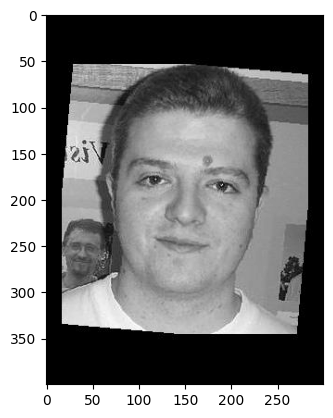

In [20]:
import matplotlib.pyplot as plt

plt.imshow(train_data[50], cmap='gray')
plt.show()

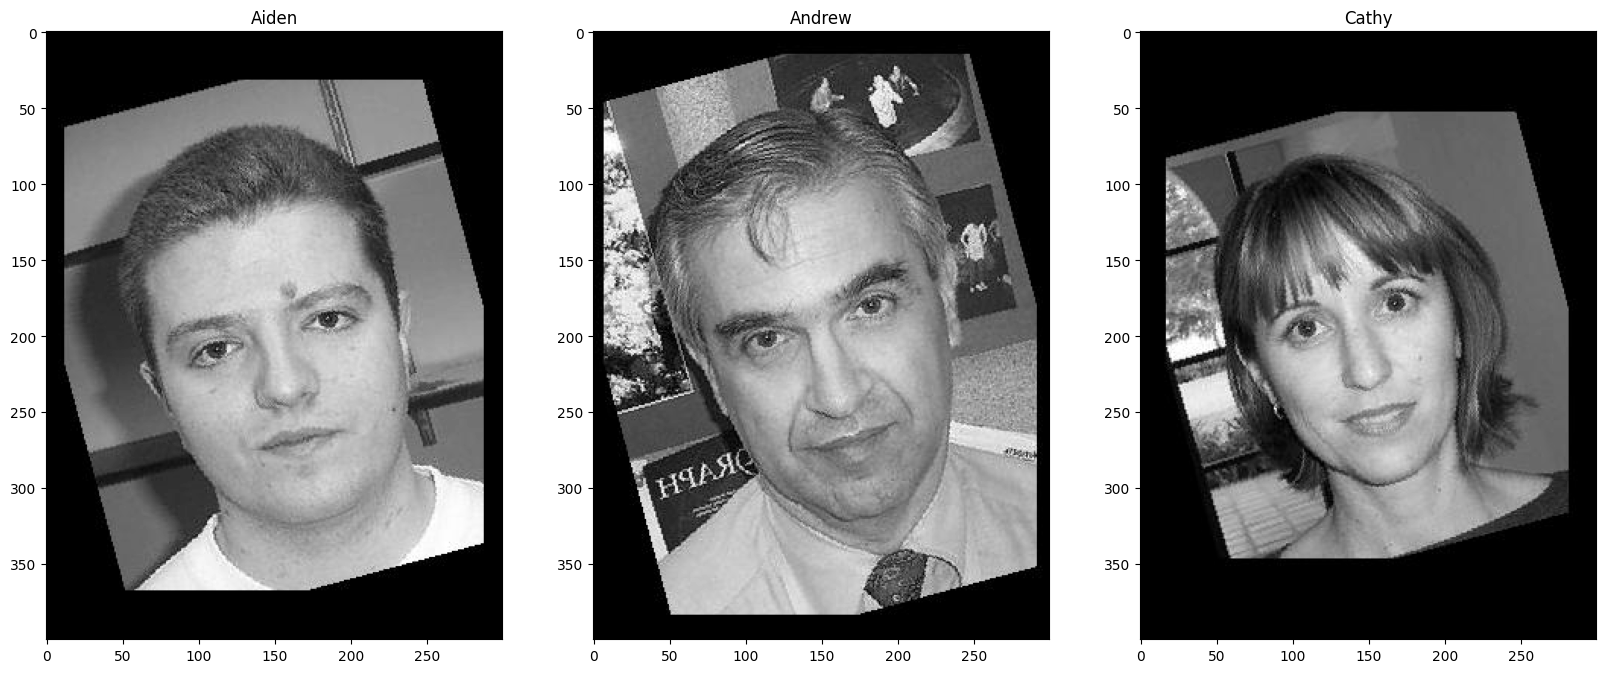

In [21]:
# 여러개 이미지를 같이 보기
plt.figure(figsize=(20, 20))
orderNo = range(0, len(dirNames)*1080, 1080)

for i in range(1, len(dirNames)+1):
    plt.subplot(1, len(dirNames), i)
    plt.imshow(train_data[orderNo[i-1]].reshape(400, 300), cmap='gray')
    plt.title(dirNames[i-1])

---
### Target Data만들기

In [22]:
target_data = [num for num in range(3) for _ in range(1080)]
print(target_data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

---
### Data들을 Tensor로 변환

In [23]:
import torch

train_input = torch.tensor(train_data)
train_target = torch.tensor(target_data)

print(train_input.shape)
print(train_target.shape)

torch.Size([3240, 400, 300])
torch.Size([3240])


### train data를 훈련과 검증으로 나누면서, 정규화, 채널 추가

In [24]:
from sklearn.model_selection import train_test_split

train_input = train_input.unsqueeze(1).float() / 255.0  # 채널 차원 추가 및 정규화
train_input, val_input, train_target, val_target = \
                            train_test_split(
                                train_input,
                                train_target,
                                test_size=0.2,
                                random_state=42
                            )

In [25]:
# dimension 확인
print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)

torch.Size([2592, 1, 400, 300]) torch.Size([2592])
torch.Size([648, 1, 400, 300]) torch.Size([648])


---
### CNN 신경망 만들기

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [27]:
# Dataset 및 DataLoader 생성
batch_size = 32 # mini batch
train_dataset = TensorDataset(train_input, train_target)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(val_input, val_target)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

---
### 모델 정의

In [28]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * int(400/4) * int(300/4), 128) 
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.9)
        self.fc2 = nn.Linear(128, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [29]:
# 손실함수와 옵티마이저
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [30]:
# 학습 함수 정의
def train(model, train_loader, criterion, optimizer, device):
    model.train() # 뉴런들이 훈련모드로 동작하도록 설정 
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # 이전 반복에서 계산된 그래디언트를 초기화 
        outputs = model(inputs) # 내부적으로 model.forward(inputs) 호출하여 예측값 얻음 
        loss = criterion(outputs, targets) # 모델의 예측값과 실제 타겟 간의 손실을 계산 
        loss.backward() # 손실에 대한 그래디언트를 계산하고 역전파 
        optimizer.step() # 계산된 그래디언트를 사용하고 모델의 파라미터를 업데이트 
    return loss.item() # 현재 배치의 손실값을 반환 

In [31]:
# 평가함수 
def evaluate(model, val_loader, criterion, device):
    model.eval() # 평가모드로 동작하도록 설정 
    total_loss = 0 # 전체 손실 합계 
    correct = 0 # 정확하게 예측한 샘플 수 
    total = 0 # 전체 샘플 수
    with torch.no_grad() : # 평가 중에는 그래디언트 계산이 필요 없으므로 메모리 사용량 및 연산 속도 향상
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs) # 예측값 발생 
            loss = criterion(outputs, targets) # 손실계산
            total_loss += loss.item() # 전체 손실에 더하기 
            _, predicted = outputs.max(1) # 전체 샘플에 대해 가장 높은 확률을 가진 인덱스 
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item() # 예측값과 실제값이 일치하는 경우 True를 발생 
        return total_loss/len(val_loader), correct/total # 평균손실과 정확도 

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=480000, out_features=128, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.9, inplace=False)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [33]:
# 훈련 반복후 차트로 확인
train_loss_scores = [] 
val_loss_scores = []

num_epochs = 10

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
    train_loss_scores.append(train_loss)
    val_loss_scores.append(val_loss)
    print(f"Epoch[{epoch+1}/{num_epochs}], Train Loss :{train_loss:.4f}, Val Loss : {val_loss:.4f}, Val Accuracy : {val_accuracy:.4f}")

Epoch[1/10], Train Loss :0.1739, Val Loss : 0.0320, Val Accuracy : 0.9954
Epoch[2/10], Train Loss :0.1861, Val Loss : 0.0102, Val Accuracy : 0.9985
Epoch[3/10], Train Loss :0.1103, Val Loss : 0.0201, Val Accuracy : 0.9907
Epoch[4/10], Train Loss :0.0463, Val Loss : 0.0145, Val Accuracy : 0.9923
Epoch[5/10], Train Loss :0.4052, Val Loss : 0.0049, Val Accuracy : 0.9985
Epoch[6/10], Train Loss :0.0284, Val Loss : 0.0016, Val Accuracy : 1.0000
Epoch[7/10], Train Loss :0.0873, Val Loss : 0.0005, Val Accuracy : 1.0000
Epoch[8/10], Train Loss :0.0568, Val Loss : 0.0015, Val Accuracy : 1.0000
Epoch[9/10], Train Loss :0.2068, Val Loss : 0.0032, Val Accuracy : 0.9985
Epoch[10/10], Train Loss :0.1295, Val Loss : 0.0006, Val Accuracy : 1.0000


In [34]:
# 훈련 평가
train_loss, train_accuracy = evaluate(model, train_loader, criterion, device)
print(f"Loss : {train_loss:.4f}, Accuracy : {train_accuracy:.4f}")

Loss : 0.0000, Accuracy : 1.0000


In [35]:
# 검증 평가
val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
print(f"Loss : {val_loss:.4f}, Accuracy : {val_accuracy:.4f}")

Loss : 0.0006, Accuracy : 1.0000


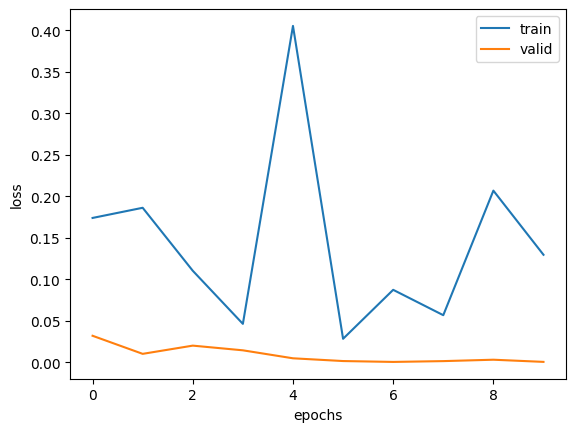

In [36]:
# 시각화 해보기
plt.plot(train_loss_scores)
plt.plot(val_loss_scores)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
# plt.ylim(0, 10)
plt.show()